<a href="https://colab.research.google.com/github/sagawritescode/ERA-V1/blob/main/Assignment7Model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Cuda

In [9]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


Transforms

In [10]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.05),
    transforms.Resize((28, 28)),
    transforms.RandomApply([transforms.RandomRotation((-10., 10.), fill=0)], p=0.05),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

Download Data

In [11]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Load test and train data using dataloader

In [12]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Plot the images

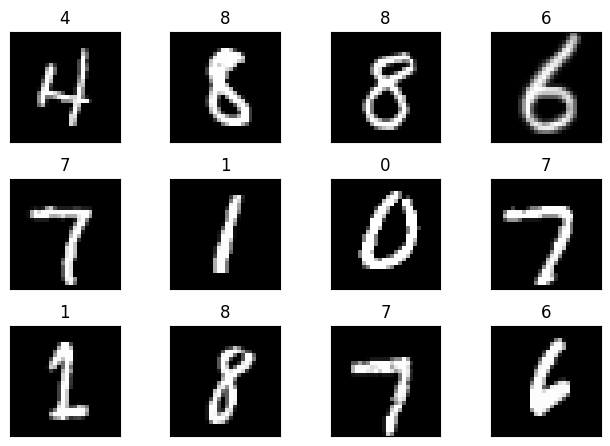

In [13]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

Initialising and summarising model

In [14]:
!pip install torchsummary
from torchsummary import summary
from model import Model4
from utils import train, test

training_model = Model4().to(device)
summary(training_model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           1,440
             ReLU-10           [-1, 16, 22, 22]               0
      BatchNorm2d-11           [-1, 16, 22, 22]              32
          Dropout-12           [-1, 16, 22, 22]               0
    

In [15]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []


CODE BLOCK: 10

In [16]:
optimizer = optim.SGD(training_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(training_model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(training_model, device, test_loader, criterion, test_acc, test_losses)
  # train(training_model, device, train_loader, optimizer, epoch)
  # test(training_model, device, test_loader)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0765 Batch_id=468 Accuracy=88.77: 100%|██████████| 469/469 [00:31<00:00, 14.77it/s]


Test set: Average loss: 0.0910, Accuracy: 9768/10000 (97.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0180 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:25<00:00, 18.70it/s]


Test set: Average loss: 0.0538, Accuracy: 9844/10000 (98.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0658 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:23<00:00, 19.84it/s]


Test set: Average loss: 0.0382, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0242 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:23<00:00, 19.84it/s]


Test set: Average loss: 0.0373, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0451 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:24<00:00, 19.15it/s]


Test set: Average loss: 0.0325, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0568 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:23<00:00, 19.98it/s]


Test set: Average loss: 0.0336, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.0176 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]


Test set: Average loss: 0.0249, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0042 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:27<00:00, 17.16it/s]


Test set: Average loss: 0.0235, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0063 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:24<00:00, 19.25it/s]


Test set: Average loss: 0.0248, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0095 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:23<00:00, 19.54it/s]


Test set: Average loss: 0.0232, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0567 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:23<00:00, 19.73it/s]


Test set: Average loss: 0.0238, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0622 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s]


Test set: Average loss: 0.0230, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.0306 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:25<00:00, 18.52it/s]


Test set: Average loss: 0.0231, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.0328 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:24<00:00, 19.52it/s]


Test set: Average loss: 0.0231, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0384 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s]


Test set: Average loss: 0.0231, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-04.


CODE BLOCK: 11

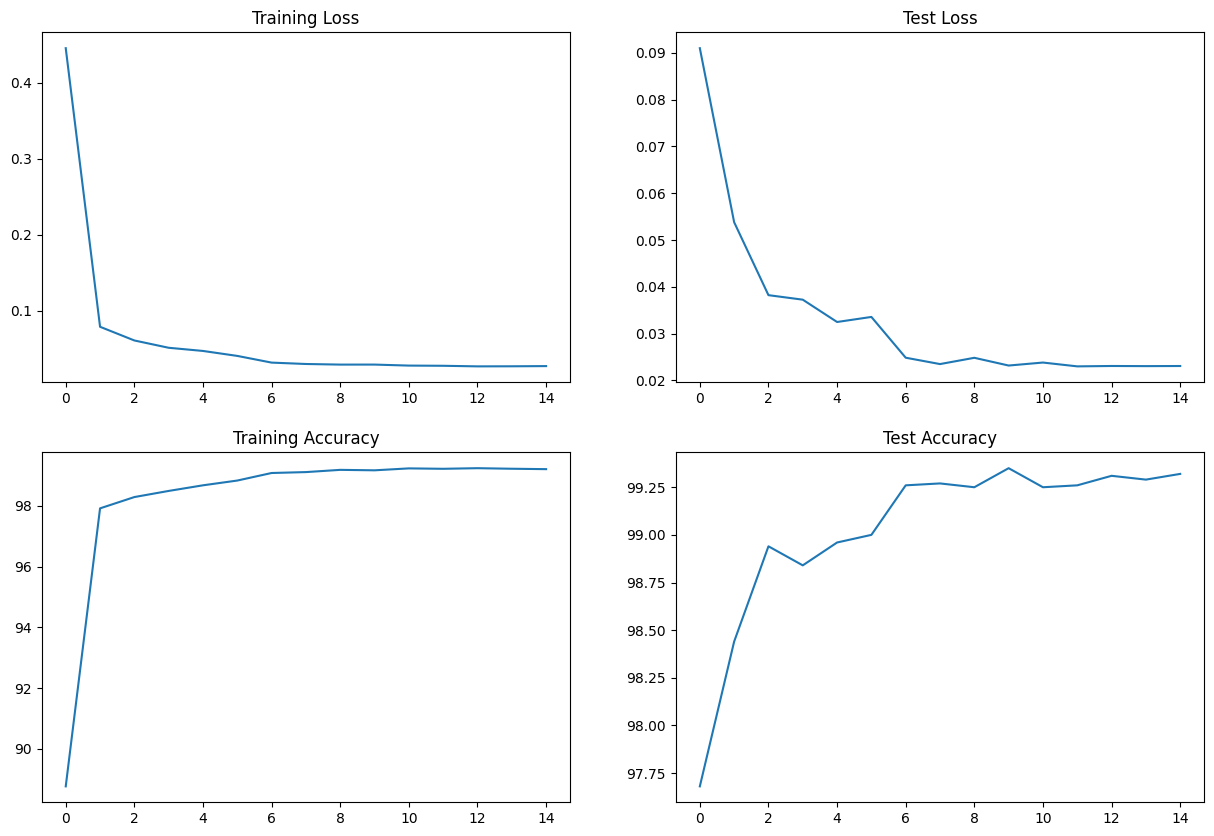

In [17]:
from utils import plot_loss_and_accuracy
plot_loss_and_accuracy(train_losses, train_acc, test_losses, test_acc)